# SVM From Scratch

本SVMスクラッチは、２つのものを行うことで普段使う数式レベルからの理解に挑戦する。
- ハードマージンSVM：数式のみで解き、得られたSVM式に、新たな情報が代入されたら正負を判定できるものにする
- ソフトマージンSVM：実装を行う。特にコスト関数と、Gradient Decentを使って小さくなっていることを確認できることを目標とする


ハードマージンSVMでは、実際にそう当てはまる事象がそう多くない。

理由として全ての訓練事例が正確に分類されなければならないという制約を前提にしているからである。

つまり、先の線形関数で分離できない場合は、制約を満たす解がそもそも存在しなくなってしまう。

そのため、実装はより実践的で数式実装の訓練となるソフトマージンが選ばれた。



In [100]:
import numpy as np
import matplotlib.pyplot as plt


# Dataset


$ D={(x[0], -1), (x[1]) ,1)}$
に対して、SVMを構築する。ただし、以下のデータセットが与えられている。

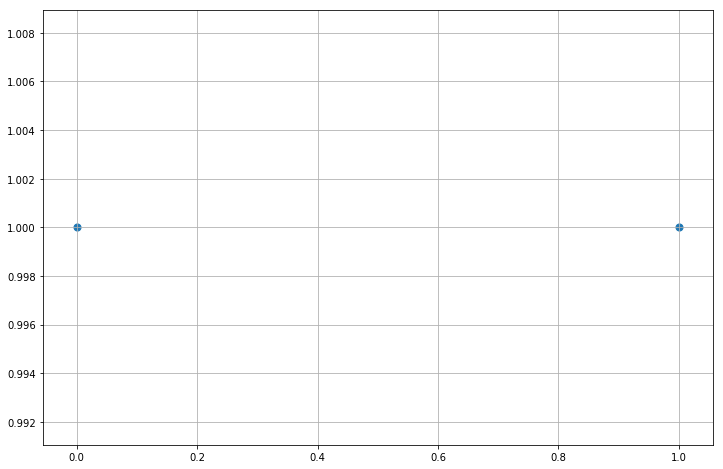

In [145]:
#2個のSamples
X=np.zeros((2,2))
X[0]=[0,1]
X[1]=[1,1]

plt.figure(figsize =(12,8))
plt.scatter(X[0], X[1], marker='o', s=50)
plt.grid()
plt.show()

# 厳密制約：ハードマージンSVM

## 求める式

このハードマージンSVMにかく数式については解説はしていない


「言語処理のための機械学習入門」の式を用いて、2値の2クラス分類を行うものである。


y(i) = +1であるようなトレーニング事例については、

wx(i) -b >= 1であればよく、

y(i) = -1であるようなトレーニング事例については、

wx(i) -b >= -1であればよい。


この二つの条件はつぎのようにまとめて表せる


y(i)(wx(i) -b) >=1


このことより、求める対象の式

f(x) = w*x-b


と置くことができる

## SVMの式から求められるものを先に計算する

求める式を　f(x) = w*x-bと置くと、

まず、以下であることがわかる


$x[0]*x[0] = 1$


$x[1]*x[1] = 2$


$x[0]*x[1] = x[1]*x[0] = 1$

## 不等式制約つき最適化問題を解く

双対ラグランジュ関数を用いる。


ラグランジュ乗数αi (>=0)を導入すると、ラグランジュ関数で表わせ、鞍点理論より、ラグランジュ関数を最大化するαiを求めればよいことがわかる


ここでの最大化問題は、この関数においては、双対問題ともいわれ、それは双対ラグランジュ関数を解くことであるとのこと。


つまり、ここではαが二つの最適化問題をとくことになり、双対ラグランジュ関数は以下となる。



$L(w, b, α1, α2)$

### 代入計算式

 -1/2{α1α1 * (-1) * (-1) * 1 + α2α2 * 1* 1* 2 + α1α2 * (-1)* (1)* 1 + α2α1* 1* (-1) * 1} + α1 + α2 

### まとめると

-1/2α1** 2 -α2** 2 + α1α2 + α1 +α2

ここで、α1* (-1) + α2 *1 = 0より、

$L(w, b, α1, α2)　= -1/2*α1**2 + 2α1$

したがって、微分すると、

-α1+2になるので

これを０とすると、$α1 = α2 = 2$  が得られた。

ここに、X[1]=[1,1]を用いて、

b = 2 * (-1) * (0, 1) (1,1) +2 *1 *(1,1)(1,1) -1 =1

分離平面は、bとして、１が得られた。

ここでは、分離平面は、w*x = bとなる点xの集合となる。

ここで、wも求めておく、

w = 2*(-1)*(0,1) + 2 * 1 *(1,1) = (2,0)

### 得られたSVM

$f(x) = (2, 0)*x-1$

が得られた。つまりこの式が０以上ならば正のクラスに、そうでなければ負のクラスに分類される。

### このSVMの使い方

x(1,0)を分類する場合、
$f(x) = (2, 0)*(1, 0)-1 = 1 > 0$

このx(1,0)は正の例となる。

この例で得られたように、ハードマージンSVMは導出もそれほど難しくない。

# 緩和制約：ソフトマージンSVM

以上の導出したSVMでは、実際のデータにはなかなかうまく動かない。

理由として全ての訓練事例が正確に分類されなければならないという制約を前提にしているからである。

つまり、先の線形関数で分離できない場合は、制約を満たす解がそもそも存在しなくなってしまう。

そこで、8/11の朝から学んだように、以下のようなソフトマージンSVMがあるので、こちらで実装する。

http://cs231n.github.io/linear-classify/

## 実装

In [250]:
x = [[0,1],[1, 1]]

In [251]:
x = np.array(x)
x

array([[0, 1],
       [1, 1]])

In [252]:
#2Dと２Classを前提にしているので、2行２列の重みがあると想定する。


W = np.array([[2,4],[1,2]])
W

array([[2, 4],
       [1, 2]])

In [253]:
t = [-1, 1]

In [254]:
# s0, s1までだす=内積
s = np.dot(W, x)
s

array([[4, 6],
       [2, 3]])

In [234]:
#適当にDeltaをとっておきます
delta = 3

## 関数　margin_sum

In [271]:
def margin_sum(x, W, delta):
    x = np.array(x)
    W = np.array(W)
    s = np.dot(W, x)
    margin_sum = 0
    for i in range(W.shape[0]):
        if i == 1:
            continue
        margin = max(0, s[0][i] - s[0][1] + delta)
        margin_sum += margin

    return margin_sum

In [409]:
X = np.array([[0,1],[1, 1]])
W = np.array([[1,2],[-1,1]])
delta = 1

In [410]:
margin_sum(x, W, delta)

0

# Gradient Decent

In [411]:
#X[0,:][:, np.newaxis].shape

In [425]:
def svm_loss_naive(W, x, y, reg):
    dW = np.zeros(W.shape) 
  
    # ロスと勾配を計算 
    num_classes = W.shape[1]
    num_train = X.shape[0]
    loss = 0.0
    for i in range(num_train):
        scores = X[i,:].dot(W)
        #print(scores)
        correct_class_score = scores[y[i]]
        #print(correct_class_score)
        for j in range(num_classes):
            if j == y[i]:
                continue
            margin_sum = scores[j] - correct_class_score + 1 
            if margin_sum > 0:
                loss += margin_sum
                #print(dW[:,y[i]].shape)
                #print(X[i,:].shape)
                dW[:,y[i]] -= X[i,:][:, np.newaxis]
                dW[:,j] += X[i,:]

    # Averaging over all examples
    loss /= num_train
    dW /= num_train

    # Add regularization
    loss += 0.5 * reg * np.sum(W * W)
    dW += reg*W
    # Wを新しくする
    W = W - dW

    return loss, dW, W

In [426]:
reg = 0.01
y = np.array([[-1],[1]])

In [427]:
svm_loss_naive(W, x, y, reg)

(array([0.535]), array([[ 0.01,  0.02],
        [-0.01,  0.01]]), array([[ 0.99,  1.98],
        [-0.99,  0.99]]))